In [1678]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [1679]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [1680]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, String, Float, Integer
from sqlalchemy import and_

In [1681]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [1682]:

Base = automap_base()

# Use the Base class to reflect the database tables

Base.prepare(autoload_with = engine)

In [1683]:
# Print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [1684]:
inspector = inspect(engine)

inspector.get_table_names()

#inspector does the same as base class key in this case

['measurement', 'station']

In [1685]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

measurement = Base.classes.measurement

station = Base.classes.station
    


In [1686]:
# Create a session
 
session = Session(bind = engine)
session






# Exploratory Precipitation Analysis

In [1687]:
# Find the most recent date in the data set.
columns = inspector.get_columns('measurement')

for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


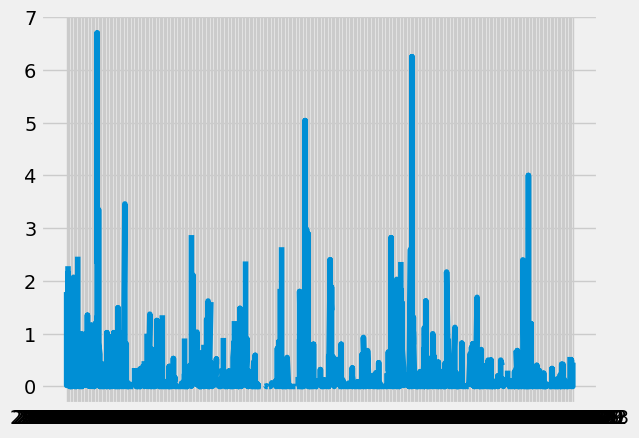

In [1688]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

session.query(measurement.date).all()




# Starting from the most recent data point in the database.
# session.query(measurement.date).order_by(measurement.date).first()

date_new = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
date_new

# Calculate the date one year from the last date in data set.

date_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_year
# # Perform a query to retrieve the data and precipitation scores
data_ret =session.query(measurement.date, measurement.prcp).filter( 
    and_(
    measurement.date <= date_new,
    measurement.date >= date_year
)).all()
data_ret
                                       


# Save the query results as a Pandas DataFrame. Explicitly set the column names

data_pd =pd.DataFrame(data_ret, columns= ['Date', 'Precipitation'])
data_pd

# Sort the dataframe by date
data_pd = data_pd.sort_values('Date')
data_pd

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(data_pd['Date'], data_pd['Precipitation'])
plt.show()

In [1689]:
# Use Pandas to calculate the summary statistics for the precipitation data

desc = data_pd.describe()
desc

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [1690]:
# Design a query to calculate the total number of stations in the dataset
columns2 = inspector.get_columns('station')


for column2 in columns2:
    print(column2['name'], column2['type'])

# session.query(station.station).all()


# station_count = session.query(measurement.station).count()
# station_count




id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [1691]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# num_station = session.query(measurement.station).order_by()
# for num in num_station: 
# group = session.query(measurement.station).group_by(measurement.station).count()
# group

# number = session.query(station.id, func.count(measurement.id).label('count')).join(measurement, station.station == measurement.station).group_by(station.id).order_by(func.count(measurement.id)).all()
# number
# for station in number:
#     print(station.id, station.count) 

active_stations = session.query(
    measurement.station,
    func.count(measurement.station).label('observation_count')
).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

for station, count in active_stations:
    print(f"Station ID: {station}, Observation Count: {count}")





Station ID: USC00519281, Observation Count: 2772
Station ID: USC00519397, Observation Count: 2724
Station ID: USC00513117, Observation Count: 2709
Station ID: USC00519523, Observation Count: 2669
Station ID: USC00516128, Observation Count: 2612
Station ID: USC00514830, Observation Count: 2202
Station ID: USC00511918, Observation Count: 1979
Station ID: USC00517948, Observation Count: 1372
Station ID: USC00518838, Observation Count: 511


In [1692]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = session.query(
    func.min(measurement.tobs).label('min'),
    func.max(measurement.tobs).label('max'),
    func.avg(measurement.tobs).label('avg')
    ).filter(measurement.station == "USC00519281").all()
stats

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'temperature by Observed Temperature values for station USC00519281 in one year')

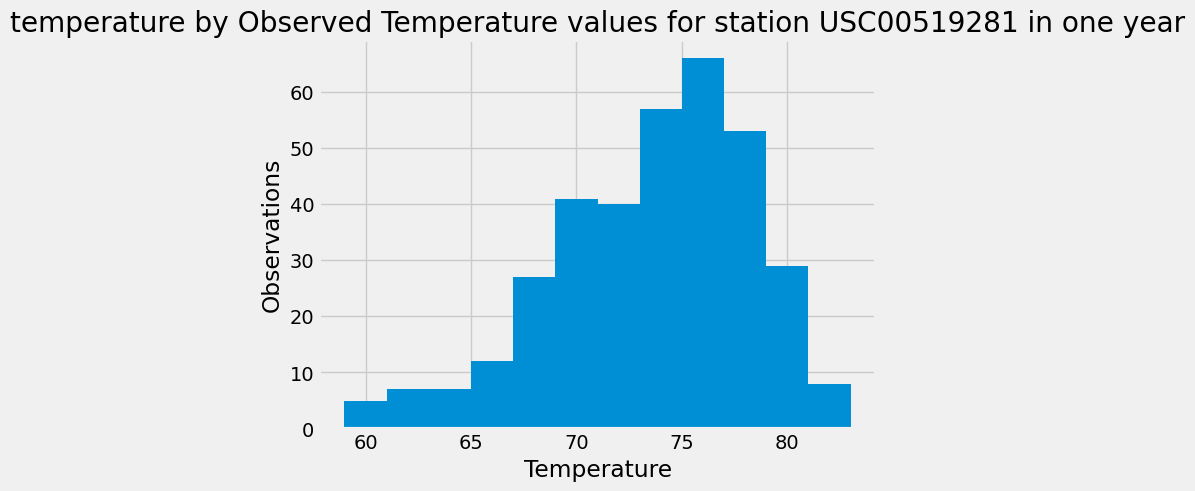

In [1693]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

date_query = session.query(measurement.tobs).filter(and_(measurement.station == "USC00519281", measurement.date <= date_new, measurement.date >= date_year)).all()
date_query

hist_data = pd.DataFrame(date_query)
hist_data

plt.hist(hist_data['tobs'], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("temperature by Observed Temperature values for station USC00519281 in one year")


# Close Session

In [1694]:
# Close Session
session.close()
